# Classificação de risco de óbitos por covid-19 - Análise para TCC

**Título:** Uso de Machine Learning para classificação de risco de óbitos por covid-19 no estado de Mato Grosso

Link: https://dspace.bc.uepb.edu.br/jspui/handle/123456789/29113

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dados_covid.csv", delimiter = ";")

## Pré-processamento de dados

In [3]:
df = df.drop(["CodigoIBGERegiao","RegiaoSaude","CodigoIBGE","Municipio","DataNotificacao","RacaCor",
              "ProfissionalSeguranca","DataInicioSintomas","Hospitalizado","FechamentoCaso","DataModificacaoObito",
              "DataEncerramentoCaso","Seq_Row_Number", 'Dias'], axis=1) 

### Tratamento de valores ausentes e inconsistentes

In [4]:
df.isnull().sum()

idade                    0
Sexo                     0
ProfissionalSaude     4326
Comorbidade              0
Cardiovascular       13247
Diabetes             11502
Hipertensao           9053
Neoplasia            14005
Obesidade            12689
Pulmonar             13796
Situacao                 0
Gestante              6702
dtype: int64

In [5]:
df = df.dropna(subset=['Pulmonar','Cardiovascular','Diabetes','Hipertensao','Obesidade', 
                       'ProfissionalSaude','Gestante','Neoplasia'], axis = 0)

In [6]:
df.describe()

,idade,Situacao
count,440169.000000,440169.000000
mean,38.478010,0.019738
std,16.952102,0.139098
min,-1.000000,0.000000
25%,26.000000,0.000000
50%,37.000000,0.000000
75%,50.000000,0.000000
max,244.000000,1.000000


### Inconsistencias: 

**Idade** com valor máximo de 244 e com valor negativo;

In [7]:
df_incos = df.loc[df['idade'] < 0]
df = df.drop(df_incos.index)

#### Determinando valor máximo idade 120 anos

In [8]:
df_incos = df.loc[df['idade'] > 120]
df = df.drop(df_incos.index)

In [9]:
df.describe()

,idade,Situacao
count,440153.000000,440153.000000
mean,38.475351,0.019739
std,16.941294,0.139101
min,0.000000,0.000000
25%,26.000000,0.000000
50%,37.000000,0.000000
75%,50.000000,0.000000
max,113.000000,1.000000


In [10]:
display(df)

,idade,Sexo,ProfissionalSaude,Comorbidade,Cardiovascular,Diabetes,Hipertensao,Neoplasia,Obesidade,Pulmonar,Situacao,Gestante
0,32,Feminino,Não,Não,Não,Não,Não,Não,Não,Não,0,Não
1,48,Feminino,Não,Sim,Não,Não,Não,Não,Não,Não,0,Não
2,62,Feminino,Não,Não,Não,Não,Não,Não,Não,Não,0,Não
3,34,Masculino,Não,Não,Não,Não,Não,Não,Não,Não,0,Não
4,57,Feminino,Não,Sim,Não,Não,Sim,Não,Não,Não,0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
460716,59,Masculino,Não,Não,Não,Não,Não,Não,Não,Não,0,Não
460717,65,Masculino,Não,Sim,Não,Não,Sim,Não,Não,Não,0,Não
460718,76,Feminino,Não,Não,Não,Não,Não,Não,Não,Não,0,Não
460719,4,Masculino,Não,Não,Não,Não,Não,Não,Não,Não,0,Não


## Descritivas

### Sexo

In [11]:
Quant = df[['Sexo']].value_counts()
Perc = df['Sexo'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Sexo     
Feminino     232473
Masculino    207680
dtype: int64
Percentual categorias:
Feminino     52.816407
Masculino    47.183593
Name: Sexo, dtype: float64


### ProfissionalSaude	

In [12]:
Quant = df[['ProfissionalSaude']].value_counts()
Perc = df['ProfissionalSaude'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
ProfissionalSaude
Não                  428135
Sim                   12018
dtype: int64
Percentual categorias:
Não    97.269586
Sim     2.730414
Name: ProfissionalSaude, dtype: float64


### Comorbidade	

In [13]:
Quant = df[['Comorbidade']].value_counts()
Perc = df['Comorbidade'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Comorbidade
Não            368592
Sim             71561
dtype: int64
Percentual categorias:
Não    83.74179
Sim    16.25821
Name: Comorbidade, dtype: float64


### Cardiovascular	

In [14]:
Quant=df[['Cardiovascular']].value_counts()
Perc=df['Cardiovascular'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Cardiovascular
Não               428976
Sim                11177
dtype: int64
Percentual categorias:
Não    97.460656
Sim     2.539344
Name: Cardiovascular, dtype: float64


### Diabetes					

In [15]:
Quant=df[['Diabetes']].value_counts()
Perc=df['Diabetes'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Diabetes
Não         422840
Sim          17313
dtype: int64
Percentual categorias:
Não    96.066595
Sim     3.933405
Name: Diabetes, dtype: float64


### Hipertensao	

In [16]:
Quant=df[['Hipertensao']].value_counts()
Perc=df['Hipertensao'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Hipertensao
Não            403010
Sim             37143
dtype: int64
Percentual categorias:
Não    91.561343
Sim     8.438657
Name: Hipertensao, dtype: float64


### Neoplasia	

In [17]:
Quant=df[['Neoplasia']].value_counts()
Perc=df['Neoplasia'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Neoplasia
Não          439391
Sim             762
dtype: int64
Percentual categorias:
Não    99.826878
Sim     0.173122
Name: Neoplasia, dtype: float64


### Obesidade	

In [18]:
Quant=df[['Obesidade']].value_counts()
Perc=df['Obesidade'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Obesidade
Não          431016
Sim            9137
dtype: int64
Percentual categorias:
Não    97.924131
Sim     2.075869
Name: Obesidade, dtype: float64


### Pulmonar	

In [19]:
Quant=df[['Pulmonar']].value_counts()
Perc=df['Pulmonar'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Pulmonar
Não         435142
Sim           5011
dtype: int64
Percentual categorias:
Não    98.861532
Sim     1.138468
Name: Pulmonar, dtype: float64


### Situacao	

In [20]:
Quant=df[['Situacao']].value_counts()
Perc=df['Situacao'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Situacao
0           431465
1             8688
dtype: int64
Percentual categorias:
0    98.026141
1     1.973859
Name: Situacao, dtype: float64


### Gestante

In [21]:
Quant=df[['Gestante']].value_counts()
Perc=df['Gestante'].value_counts(normalize = True)*100
print("Quantidades categorias: \n{}".format(Quant))
print("Percentual categorias:\n{}".format(Perc))

Quantidades categorias: 
Gestante
Não         437798
Sim           2355
dtype: int64
Percentual categorias:
Não    99.464959
Sim     0.535041
Name: Gestante, dtype: float64


### idade

Text(0, 0.5, 'Frequência')

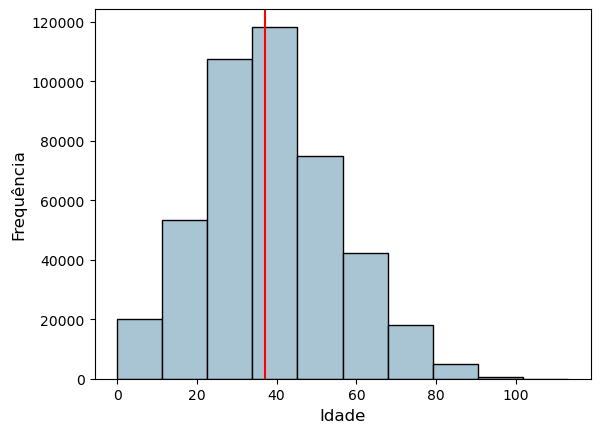

In [22]:
median = df["idade"].median()
median
mean = df["idade"].mean()
fig, ax = plt.subplots() 
df['idade'].hist(color='#A9C5D3', edgecolor='black',   
                          grid=False) 
plt.axvline(median, color='r' ) 
ax.set_title('', fontsize=12) 
ax .set_xlabel('Idade', fontsize=12) 
ax.set_ylabel('Frequência', fontsize=12)

In [23]:
median = df["idade"].median()
median

37.0

## Divisão entre previsores e classe

### Previsores

In [24]:
df.columns

Index(['idade', 'Sexo', 'ProfissionalSaude', 'Comorbidade', 'Cardiovascular',
       'Diabetes', 'Hipertensao', 'Neoplasia', 'Obesidade', 'Pulmonar',
       'Situacao', 'Gestante'],
      dtype='object')

In [25]:
X_df = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,11]].values
X_df

array([[32, 'Feminino', 'Não', ..., 'Não', 'Não', 'Não'],
       [48, 'Feminino', 'Não', ..., 'Não', 'Não', 'Não'],
       [62, 'Feminino', 'Não', ..., 'Não', 'Não', 'Não'],
       ...,
       [76, 'Feminino', 'Não', ..., 'Não', 'Não', 'Não'],
       [4, 'Masculino', 'Não', ..., 'Não', 'Não', 'Não'],
       [64, 'Feminino', 'Não', ..., 'Não', 'Não', 'Não']], dtype=object)

### Classe

In [26]:
y_df = df.iloc[:, 10].values
y_df

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
df.groupby('Situacao').size()

Situacao
0    431465
1      8688
dtype: int64

## Tratamento do tipo das variáveis

### LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Sexo = LabelEncoder()
label_encoder_ProfissionalSaude = LabelEncoder()
label_encoder_Comorbidade = LabelEncoder()
label_encoder_Cardiovascular = LabelEncoder()
label_encoder_Diabetes = LabelEncoder()
label_encoder_Hipertensao = LabelEncoder()
label_encoder_Neoplasia = LabelEncoder()
label_encoder_Obesidade = LabelEncoder()
label_encoder_Pulmonar = LabelEncoder()
label_encoder_Gestante = LabelEncoder()


X_df[:,1] = label_encoder_Sexo.fit_transform(X_df[:,1])
X_df[:,2] = label_encoder_ProfissionalSaude.fit_transform(X_df[:,2])
X_df[:,3] = label_encoder_Comorbidade.fit_transform(X_df[:,3])
X_df[:,4] = label_encoder_Cardiovascular.fit_transform(X_df[:,4])
X_df[:,5] = label_encoder_Diabetes.fit_transform(X_df[:,5])
X_df[:,6] = label_encoder_Hipertensao.fit_transform(X_df[:,6])
X_df[:,7] = label_encoder_Neoplasia.fit_transform(X_df[:,7])
X_df[:,8] = label_encoder_Obesidade.fit_transform(X_df[:,8])
X_df[:,9] = label_encoder_Pulmonar.fit_transform(X_df[:,9])
X_df[:,10] = label_encoder_Gestante.fit_transform(X_df[:,10])

X_df[1]

array([48, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440153 entries, 0 to 460720
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   idade              440153 non-null  int64 
 1   Sexo               440153 non-null  object
 2   ProfissionalSaude  440153 non-null  object
 3   Comorbidade        440153 non-null  object
 4   Cardiovascular     440153 non-null  object
 5   Diabetes           440153 non-null  object
 6   Hipertensao        440153 non-null  object
 7   Neoplasia          440153 non-null  object
 8   Obesidade          440153 non-null  object
 9   Pulmonar           440153 non-null  object
 10  Situacao           440153 non-null  int64 
 11  Gestante           440153 non-null  object
dtypes: int64(2), object(10)
memory usage: 43.7+ MB


## Escalonamento de valores

In [30]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_df = scaler_census.fit_transform(X_df)
X_df[0]

array([-0.38222333, -0.9451725 , -0.16754279, -0.44062106, -0.16141583,
       -0.20234763, -0.30358519, -0.04164395, -0.1455979 , -0.10731161,
       -0.07334298])

# Divisão entre treinamento e teste

In [31]:
from sklearn.model_selection import train_test_split
seed=2230
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.20, stratify = y_df)

In [32]:
X_train.shape, y_train.shape

((352122, 11), (352122,))

In [33]:
X_test.shape, y_test.shape

((88031, 11), (88031,))

### Tecnica de Sub-amostragem da classe majoritaria

In [34]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print("Antes: ", Counter(y_train))

Antes:  Counter({0: 345172, 1: 6950})


In [35]:
undersample = RandomUnderSampler(sampling_strategy=1)
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [36]:
print("Depois: ", Counter(y_train))

Depois:  Counter({0: 6950, 1: 6950})


# Algoritmos de Machine Learning

Bibliotecas utilizadas para os modelos e metricas

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve

## Random Forest

In [38]:
rf = RandomForestClassifier(min_samples_split=25, n_estimators=1200, random_state=0)
rf.fit(X_train, y_train)
predCV =  cross_val_predict(rf, X_train, y_train, cv=5)
print('Resultado Fase de Treinamento')
    
rf_pred_train = rf.predict(X_train) # previsão classe positiva para os dados de treino 
print('\nAUC previsão (Random Forest) - Treino: {}'.format(roc_auc_score(y_train, rf_pred_train)))
print("Validação cruzada (AUC ROC) {}".format(roc_auc_score(y_train, predCV)))
print('Classificação report do Random Forest (Treino):\n {}'.format(classification_report(y_train, rf_pred_train)))
    
print('Resultado Fase de Teste')
rf_pred_test = rf.predict(X_test) # previsão classe positiva para os dados de teste
print('\nAUC previsão (Random Forest) - Teste: {}'.format(roc_auc_score(y_test, rf_pred_test)))
print('Matriz de confusão AUC (Random Forest) - Teste:\n{}'.format(confusion_matrix(y_test, rf_pred_test)))
print('Classificação report do Random Forest (Teste):\n {}'.format(classification_report(y_test, rf_pred_test)))
contribution = rf.feature_importances_
print("Variáveis importância : {}".format(contribution))

Resultado Fase de Treinamento

AUC previsão (Random Forest) - Treino: 0.8168345323741008
Validação cruzada (AUC ROC) 0.8031654676258994
Classificação report do Random Forest (Treino):
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      6950
           1       0.81      0.82      0.82      6950

    accuracy                           0.82     13900
   macro avg       0.82      0.82      0.82     13900
weighted avg       0.82      0.82      0.82     13900

Resultado Fase de Teste

AUC previsão (Random Forest) - Teste: 0.7994892411470931
Matriz de confusão AUC (Random Forest) - Teste:
[[68271 18022]
 [  334  1404]]
Classificação report do Random Forest (Teste):
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     86293
           1       0.07      0.81      0.13      1738

    accuracy                           0.79     88031
   macro avg       0.53      0.80      0.51     88031
weighte

In [39]:
#TAXA DE FALSO POSITIVO (1-ESPECIFICIDADE)
FP = 1-(68271/(68271+18022))
#TAXA DE VERDADEIRO POSITIVO (SENSIBILIDADE)
VP = 1404/(1404+334)
print("False Positive Rate: {:.3f}".format(FP))
print("True Positive Rate: {:.3f}".format(VP))

False Positive Rate: 0.209
True Positive Rate: 0.808


## Regressão Logística

In [40]:
rl = LogisticRegression(random_state=0)
rl.fit(X_train, y_train)
predCV =  cross_val_predict(rl, X_train, y_train, cv=5)
print('Resultado Fase de Treinamento')
    
rl_pred_train = rl.predict(X_train) # previsão classe positiva para os dados de treino 
print('\nAUC previsão (Regressão logística) - Treino: {}'.format(roc_auc_score(y_train, rl_pred_train)))
print("Validação cruzada (AUC ROC) {}".format(roc_auc_score(y_train, predCV)))
print('Classificação report Regressão logística:\n {}'.format(classification_report(y_train, rl_pred_train)))
    
print('Resultado Fase de Teste')
rl_pred_test = rl.predict(X_test) # previsão classe positiva para os dados de teste
print('\nAUC previsão (Regressão logística)- Teste {}'.format(roc_auc_score(y_test, rl_pred_test)))
print('Matriz de confusão AUC (Regressão logística) - Teste:\n{}'.format(confusion_matrix(y_test, rl_pred_test)))
print('Classificação report Regressão logística (Teste):\n {}'.format(classification_report(y_test, rl_pred_test)))
contribution = rl.coef_
print("Variáveis importância : {}".format(contribution))

Resultado Fase de Treinamento

AUC previsão (Regressão logística) - Treino: 0.8066187050359712
Validação cruzada (AUC ROC) 0.8066906474820145
Classificação report Regressão logística:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      6950
           1       0.81      0.79      0.80      6950

    accuracy                           0.81     13900
   macro avg       0.81      0.81      0.81     13900
weighted avg       0.81      0.81      0.81     13900

Resultado Fase de Teste

AUC previsão (Regressão logística)- Teste 0.8057698043691084
Matriz de confusão AUC (Regressão logística) - Teste:
[[70199 16094]
 [  351  1387]]
Classificação report Regressão logística (Teste):
               precision    recall  f1-score   support

           0       1.00      0.81      0.90     86293
           1       0.08      0.80      0.14      1738

    accuracy                           0.81     88031
   macro avg       0.54      0.81      0.52     

In [41]:
#TAXA DE FALSO POSITIVO (1-ESPECIFICIDADE)
FP = 1-(70199/(70199+16094))
#TAXA DE VERDADEIRO POSITIVO (SENSIBILIDADE)
VP = 1387/(1387+351)
print("False Positive Rate: {:.3f}".format(FP))
print("True Positive Rate: {:.3f}".format(VP))

False Positive Rate: 0.187
True Positive Rate: 0.798


## XGBoost

In [42]:
xgboost = xgb.XGBClassifier(max_depth = 2, random_state=0)
xgboost.fit(X_train, y_train)
predCV =  cross_val_predict(xgboost, X_train, y_train, cv=5)
print('Resultado Fase de Treinamento')
    
xgboost_class_train = xgboost.predict(X_train) # previsão classe positiva para os dados de treino 
print('\nAUC previsão (XGBoost) - Treino: {}'.format(roc_auc_score(y_train, xgboost_class_train)))
print("Validação cruzada (AUC ROC) {}".format(roc_auc_score(y_train, predCV)))
print('Classificação report XGBoost:\n {}'.format(classification_report(y_train, xgboost_class_train)))
    
print('Resultado Fase de Teste')
xgboost_class_test = xgboost.predict(X_test) # previsão classe positiva para os dados de teste
print('\nAUC previsão (XGBoost)- Teste {}'.format(roc_auc_score(y_test, xgboost_class_test)))
print('Matriz de confusão AUC (XGBoost) - Teste:\n{}'.format(confusion_matrix(y_test, xgboost_class_test)))
print('Classificação report XGBoost (Teste):\n {}'.format(classification_report(y_test, xgboost_class_test)))
contribution = xgboost.feature_importances_
print("Variáveis importância : {}".format(contribution))

Resultado Fase de Treinamento

AUC previsão (XGBoost) - Treino: 0.8092805755395683
Validação cruzada (AUC ROC) 0.8065467625899281
Classificação report XGBoost:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      6950
           1       0.80      0.82      0.81      6950

    accuracy                           0.81     13900
   macro avg       0.81      0.81      0.81     13900
weighted avg       0.81      0.81      0.81     13900

Resultado Fase de Teste

AUC previsão (XGBoost)- Teste 0.8028021472912349
Matriz de confusão AUC (XGBoost) - Teste:
[[68098 18195]
 [  319  1419]]
Classificação report XGBoost (Teste):
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     86293
           1       0.07      0.82      0.13      1738

    accuracy                           0.79     88031
   macro avg       0.53      0.80      0.51     88031
weighted avg       0.98      0.79      0.87     88031


In [43]:
#TAXA DE FALSO POSITIVO (1-ESPECIFICIDADE)
FP = 1-(68098/(68098+18195))
#TAXA DE VERDADEIRO POSITIVO (SENSIBILIDADE)
VP = 1419/(1419+319)
print("False Positive Rate: {:.3f}".format(FP))
print("True Positive Rate: {:.3f}".format(VP))

False Positive Rate: 0.211
True Positive Rate: 0.816


## LightGBM

In [44]:
gbm = lgb.LGBMClassifier(max_depth = 2,random_state=0)
gbm.fit(X_train, y_train)
predCV =  cross_val_predict(gbm, X_train, y_train, cv=5)
print('Resultado Fase de Treinamento')
    
gbm_pred_train = gbm.predict(X_train) # previsão classe positiva para os dados de treino 
print('\nAUC previsão (LightGBM) - Treino: {}'.format(roc_auc_score(y_train, gbm_pred_train)))
print("Validação cruzada (AUC ROC) {}".format(roc_auc_score(y_train, predCV)))
print('Classificação report LightGBM:\n {}'.format(classification_report(y_train, gbm_pred_train)))
    
print('Resultado Fase de Teste')
gbm_pred_test = gbm.predict(X_test) # previsão classe positiva para os dados de teste
print('\nAUC previsão (LightGBM)- Teste {}'.format(roc_auc_score(y_test, gbm_pred_test)))
print('Matriz de confusão AUC (LightGBM) - Teste:\n{}'.format(confusion_matrix(y_test, gbm_pred_test)))
print('Classificação report LightGBM (Teste):\n {}'.format(classification_report(y_test, gbm_pred_test)))
contribution = gbm.feature_importances_
print("Variáveis importância : {}".format(contribution))

Resultado Fase de Treinamento

AUC previsão (LightGBM) - Treino: 0.8072661870503598
Validação cruzada (AUC ROC) 0.8044604316546762
Classificação report LightGBM:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      6950
           1       0.81      0.81      0.81      6950

    accuracy                           0.81     13900
   macro avg       0.81      0.81      0.81     13900
weighted avg       0.81      0.81      0.81     13900

Resultado Fase de Teste

AUC previsão (LightGBM)- Teste 0.8040527804373295
Matriz de confusão AUC (LightGBM) - Teste:
[[68860 17433]
 [  330  1408]]
Classificação report LightGBM (Teste):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     86293
           1       0.07      0.81      0.14      1738

    accuracy                           0.80     88031
   macro avg       0.53      0.80      0.51     88031
weighted avg       0.98      0.80      0.87     8

In [45]:
#TAXA DE FALSO POSITIVO (1-ESPECIFICIDADE)
FP = 1-(68860/(68860+17433))
#TAXA DE VERDADEIRO POSITIVO (SENSIBILIDADE)
VP = 1408/(1408+330)
print("False Positive Rate: {:.3f}".format(FP))
print("True Positive Rate: {:.3f}".format(VP))

False Positive Rate: 0.202
True Positive Rate: 0.810


## CatBoost

In [46]:
cat = CatBoostClassifier(max_depth = 2,n_estimators=1300, eta=0.04, random_state=0, verbose=False)
cat.fit(X_train, y_train)
predCV =  cross_val_predict(cat, X_train, y_train, cv=5)
print('Resultado Fase de Treinamento')
    
cat_pred_train = cat.predict(X_train) # previsão classe positiva para os dados de treino 
print('\nAUC previsão (CatBoost) - Treino: {}'.format(roc_auc_score(y_train, cat_pred_train)))
print("Validação cruzada (AUC ROC) {}".format(roc_auc_score(y_train, predCV)))
print('Classificação report CatBoost:\n {}'.format(classification_report(y_train, cat_pred_train)))
    
print('Resultado Fase de Teste')
cat_pred_test = cat.predict(X_test) # previsão classe positiva para os dados de teste
print('\nAUC previsão (CatBoost)- Teste {}'.format(roc_auc_score(y_test, cat_pred_test)))
print('Matriz de confusão AUC (CatBoost) - Teste:\n{}'.format(confusion_matrix(y_test, cat_pred_test)))
print('Classificação report CatBoost (Teste):\n {}'.format(classification_report(y_test, cat_pred_test)))
contribution = cat.feature_importances_
print("Variáveis importância : {}".format(contribution))

Resultado Fase de Treinamento

AUC previsão (CatBoost) - Treino: 0.8099999999999999
Validação cruzada (AUC ROC) 0.8055395683453238
Classificação report CatBoost:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      6950
           1       0.81      0.81      0.81      6950

    accuracy                           0.81     13900
   macro avg       0.81      0.81      0.81     13900
weighted avg       0.81      0.81      0.81     13900

Resultado Fase de Teste

AUC previsão (CatBoost)- Teste 0.8050131495290812
Matriz de confusão AUC (CatBoost) - Teste:
[[69274 17019]
 [  335  1403]]
Classificação report CatBoost (Teste):
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     86293
           1       0.08      0.81      0.14      1738

    accuracy                           0.80     88031
   macro avg       0.54      0.81      0.51     88031
weighted avg       0.98      0.80      0.87     8

In [47]:
#TAXA DE FALSO POSITIVO (1-ESPECIFICIDADE)
FP = 1-(69274/(69274+17019))
#TAXA DE VERDADEIRO POSITIVO (SENSIBILIDADE)
VP = 1403/(1403+335)
print("False Positive Rate: {:.3f}".format(FP))
print("True Positive Rate: {:.3f}".format(VP))

False Positive Rate: 0.197
True Positive Rate: 0.807


### Curva ROC para os dois modelos com melhor desempenho

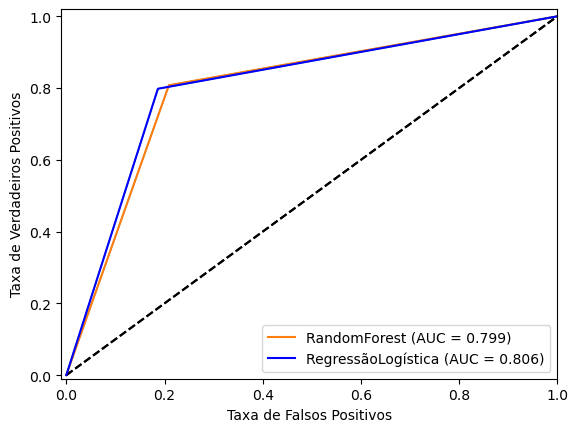

In [48]:
rf_auc = roc_auc_score(y_test, rf_pred_test)
rl_auc = roc_auc_score(y_test, rl_pred_test)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_pred_test)
rl_fpr, rl_tpr, rl_thresholds = roc_curve(y_test, rl_pred_test)

def plot_roc_curve(rf_fpr, rf_tpr, label=None):
    plt.plot(rf_fpr, rf_tpr, linewidth=1, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, -0.01, 1.02])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.plot(rf_fpr, rf_tpr, label='RandomForest (AUC = %0.3f)' % rf_auc)
    plt.legend(loc="lower right")
plot_roc_curve(rf_fpr, rf_tpr)
def plot_roc_curve(rl_fpr, rl_tpr, label=None):
    plt.plot(rl_fpr, rl_tpr, linewidth=1, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, -0.01, 1.02])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.plot(rl_fpr, rl_tpr, label='RegressãoLogística (AUC = %0.3f)' % rl_auc, color="b")
    plt.legend(loc="lower right")
plot_roc_curve(rl_fpr, rl_tpr)
plt.show()

## Análises posteriores ao TCC

### Redes Neurais

Resultado não foi superior a regressão logística, considerando principais métricas: AUC, VP, VF e acurácia

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
def run_RNeural(X_train, X_test, y_train, y_test):
    rn = MLPClassifier(max_iter=500,random_state=0)
    rn.fit(X_train, y_train)
    predCV =  cross_val_predict(rn, X_train, y_train, cv=5)
    print('Resultado Fase de Treinamento')
    
    pred_class_train = rn.predict(X_train) # previsão classe positiva para os dados de treino 
    print('\nAUC previsão (Redes Neurais) - Treino: {}'.format(roc_auc_score(y_train, pred_class_train)))
    print("Validação cruzada (AUC ROC) {}".format(roc_auc_score(y_train, predCV)))
    print('Classificação report Redes Neurais:\n {}'.format(classification_report(y_train, pred_class_train)))
    
    print('Resultado Fase de Teste')
    pred_class_test = rn.predict(X_test) # previsão classe positiva para os dados de teste
    print('\nAUC previsão (Redes Neurais)- Teste {}'.format(roc_auc_score(y_test, pred_class_test)))
    print('Matriz de confusão AUC (Redes Neurais) - Teste:\n{}'.format(confusion_matrix(y_test, pred_class_test)))
    print('Classificação report Redes Neurais (Teste):\n {}'.format(classification_report(y_test, pred_class_test)))
    return pred_class_train, pred_class_test

pred_class_train, pred_class_test = run_RNeural(X_train,X_test,y_train, y_test)

Resultado Fase de Treinamento

AUC previsão (Redes Neurais) - Treino: 0.8088489208633094
Validação cruzada (AUC ROC) 0.8056834532374101
Classificação report Redes Neurais:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      6950
           1       0.80      0.82      0.81      6950

    accuracy                           0.81     13900
   macro avg       0.81      0.81      0.81     13900
weighted avg       0.81      0.81      0.81     13900

Resultado Fase de Teste

AUC previsão (Redes Neurais)- Teste 0.8062876863031092
Matriz de confusão AUC (Redes Neurais) - Teste:
[[68352 17941]
 [  312  1426]]
Classificação report Redes Neurais (Teste):
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     86293
           1       0.07      0.82      0.14      1738

    accuracy                           0.79     88031
   macro avg       0.53      0.81      0.51     88031
weighted avg       0.98 

In [51]:
#TAXA DE FALSO POSITIVO (1-ESPECIFICIDADE)
FP = 1-(68352/(68352+17941))
#TAXA DE VERDADEIRO POSITIVO (SENSIBILIDADE)
VP = 1426/(1426+312)
print("False Positive Rate: {:.3f}".format(FP))
print("True Positive Rate: {:.3f}".format(VP))

False Positive Rate: 0.208
True Positive Rate: 0.820


### Shapley value

In [52]:
import shap

In [53]:
feature_names = ['Idade', 'Sexo', 'ProfissionalSaude', 'Comorbidade', 'Cardiovascular', 'Diabetes',
                 'Hipertensão', 'Neoplasia', 'Obesidade', 'Pulmonar', 'Gestante']

masker = shap.maskers.Independent(data=X_test)
explainer = shap.LinearExplainer(rl, masker=masker, feature_names=feature_names)
shap_values = explainer(X_test)

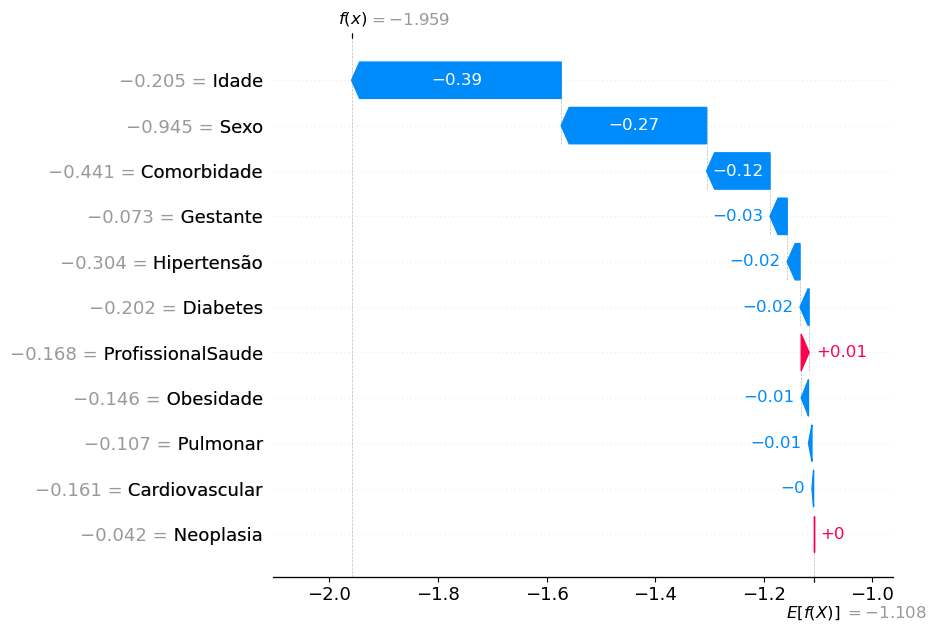

In [54]:
shap.plots.waterfall(shap_values[0],  max_display=11)

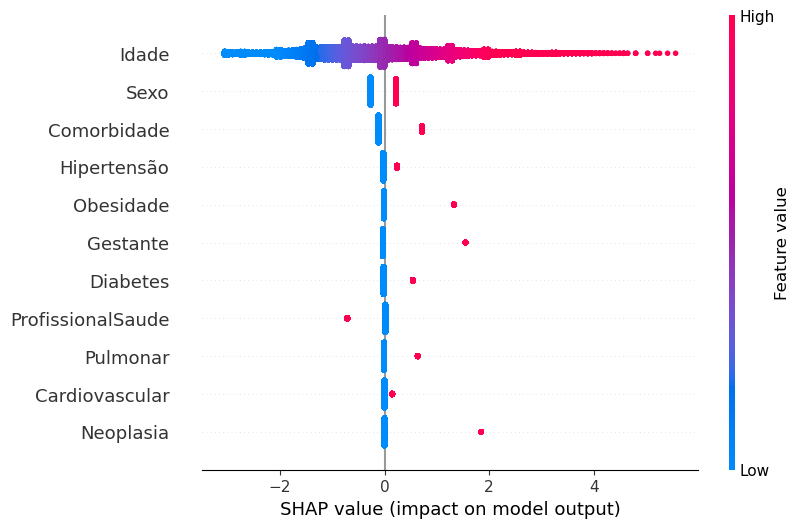

In [55]:
shap.plots.beeswarm(shap_values, max_display=11)

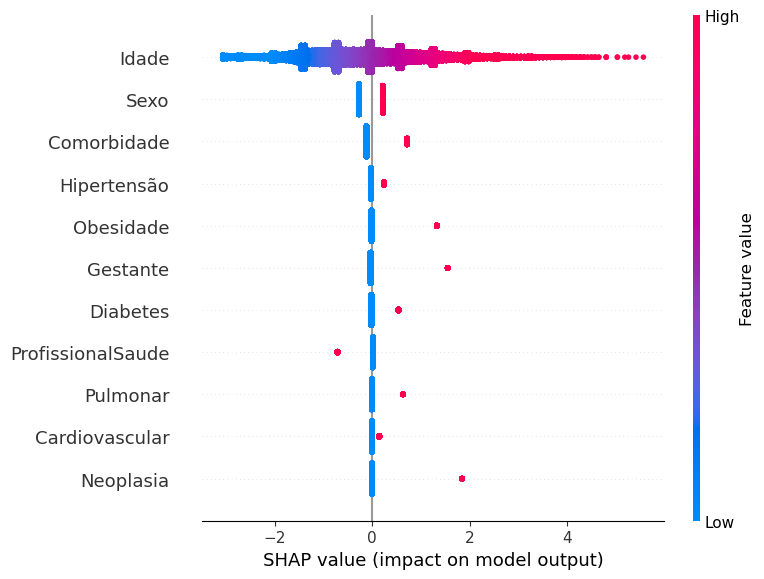

In [56]:
shap.summary_plot(shap_values, X_test)